In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost+= R[n,k] * d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter=25, beta=1):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    
    for i in range(K):
        M[i] = X[np.random.choice(N)]
        
    costs = np.zeros(max_iter)
    
    for i in range(max_iter):
            for k in range(K):
                for n in range(N):
                    R[n, k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
            for k in range(K):
                M[k] = R[:, k].dot(X)/R[:,k].sum()
            costs[i] = cost(X, R, M)
            if i > 0:
                if np.abs(costs[i] - costs[i-1]) < 0.1:
                    break
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.show()    

In [39]:
D = 2
S = 4
foo1 = np.array([0,0])
foo2 = np.array([S, S])
foo3 = np.array([0, S])
N = 900
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + foo1
X[300:600, :] = np.random.randn(300, D) + foo3
X[600:, :] = np.random.randn(300, D) + foo2

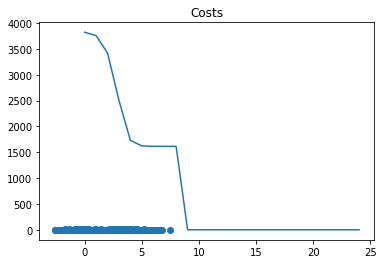

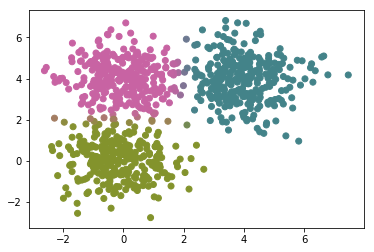

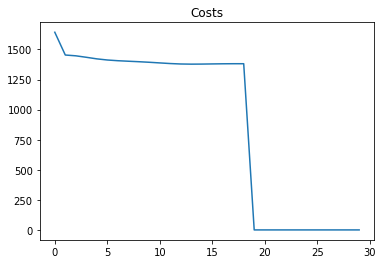

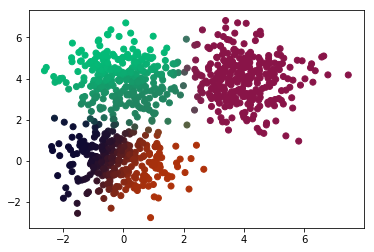

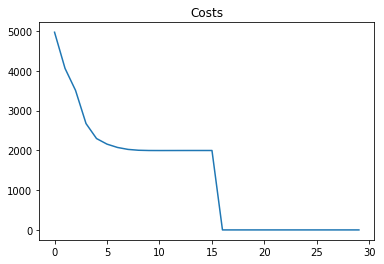

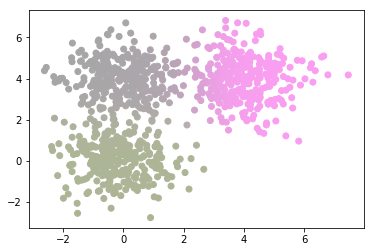

In [40]:
plt.scatter(X[:,0], X[:,1])
K = 3
plot_k_means(X, K)

K = 5
plot_k_means(X, K, max_iter=30)

K = 5
plot_k_means(X, K, max_iter=30, beta=0.3)